In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https:/

In [70]:
def chocochip_count(imgname):
    
    img = cv.imread(imgname, 1) 
    scaled_cookie = cv.resize(img, (255,255)) #scale image

    #using grabcut to get the mask of where the foreground is
    mask = np.zeros(scaled_cookie.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65), np.float64)

    #only the edges(20 px) will def be the background 
    rectangle = (20, 20, 224, 224) 

    cv.grabCut(scaled_cookie, mask, rectangle, bgmodel, fgmodel, 18, cv.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 
    image_fg = scaled_cookie * mask2[:, :, np.newaxis] #for blob test

    #make image greyscale -> blur -> thresholding
    bw_im = cv.cvtColor(scaled_cookie, cv.COLOR_BGR2GRAY)
    blur_im = cv.GaussianBlur(bw_im,(3,3),0)
    #thresholding to make chocochips more prominent
    ret,thresh_im = cv.threshold(blur_im, 85,255,cv.THRESH_BINARY_INV)

    #invert the colors; blob detections works better on white bg
    im = cv.bitwise_not(thresh_im)

    #initializing parameters for blob detection
    params = cv.SimpleBlobDetector_Params()
    #detector = cv.SimpleBlobDetector(params)

    #params.minThreshold = 0
    #params.maxThreshold = 100

    params.filterByCircularity = True
    params.minCircularity = 0.18

    #params.filterByArea = True
    #params.minArea = 55
    #params.maxArea = 5000

    params.filterByConvexity = True
    params.minConvexity = 0.2

    params.filterByInertia = True
    params.minInertiaRatio = 0.1
    
    ver = (cv.__version__).split('.')
    if int(ver[0]) < 3 :  #if you have opencv ver2.x
        detector = cv.SimpleBlobDetector(params)
    else : 
        detector = cv.SimpleBlobDetector_create(params)   #for opencv 3.x and above

    #detector = cv.SimpleBlobDetector_create(params) #for opencv 3.+

    #list of found blobs
    keypoints = detector.detect(im)

    #length of the list is number of chocochips
    return len(keypoints)


In [65]:
imgname = 'cookies/cookie0.jpg'

In [71]:
chocochip_count(imgname)

18

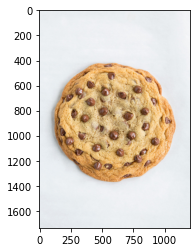

In [73]:
img = cv.imread(imgname, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))